In [1]:
library(arules)
library(ggplot2)
library(recommenderlab)

Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Loading required package: proxy


Attaching package: 'proxy'


The following object is masked from 'package:Matrix':

    as.matrix


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



# 14.1 关联规则

e.g.1:手机保护壳交易数据库中的关联规则

In [2]:
load('Data/Faceplate.rda')
fp.mat <- as.matrix(Faceplate[, -1])
fp.trans <- as(fp.mat, "transactions")
inspect(fp.trans)

     items                    
[1]  {Red, White, Green}      
[2]  {White, Orange}          
[3]  {White, Blue}            
[4]  {Red, White, Orange}     
[5]  {Red, Blue}              
[6]  {White, Blue}            
[7]  {Red, Blue}              
[8]  {Red, White, Blue, Green}
[9]  {Red, White, Blue}       
[10] {Yellow}                 


In [3]:
fp.df <- read.csv("Data/Faceplate.csv")
fp.mat <- as.matrix(fp.df[, -1])
fp.trans <- as(fp.mat, "transactions")
inspect(fp.trans)

     items                    
[1]  {Red, White, Green}      
[2]  {White, Orange}          
[3]  {White, Blue}            
[4]  {Red, White, Orange}     
[5]  {Red, Blue}              
[6]  {White, Blue}            
[7]  {Red, Blue}              
[8]  {Red, White, Blue, Green}
[9]  {Red, White, Blue}       
[10] {Yellow}                 


In [4]:
rules <- apriori(fp.trans, parameter = list(support = 0.2, confidence = 0.5, target = "rules"))
inspect(head(sort(rules, by = "lift"), n = 6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [18 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs               rhs     support confidence coverage lift     count
[1] {Red, White}   => {Green} 0.2     0.5        0.4      2.500000 2    
[2] {Green}        => {Red}   0.2     1.0        0.2      1.666667 2    
[3] {White, Green} => {Red}   0.2     1.0        0.2      1.666667 2    
[4]

e.g.2:图书购买交易数据库中的关联规则

In [5]:
book_df <- read.csv("Data/CharlesBookClub.csv")

count_book_df <- book_df[, 8:18]
incid_book_df <- ifelse(count_book_df > 0, 1, 0)
incid_book_mat <- as.matrix(incid_book_df[, -1])

books_trans <- as(incid_book_mat, "transactions")
inspect(head((books_trans),n = 15))

     items                                         
[1]  {YouthBks, CookBks}                           
[2]  {}                                            
[3]  {YouthBks, CookBks, RefBks, GeogBks, ItalCook}
[4]  {}                                            
[5]  {}                                            
[6]  {}                                            
[7]  {GeogBks}                                     
[8]  {}                                            
[9]  {}                                            
[10] {CookBks}                                     
[11] {CookBks}                                     
[12] {ArtBks, Florence}                            
[13] {Florence}                                    
[14] {}                                            
[15] {}                                            


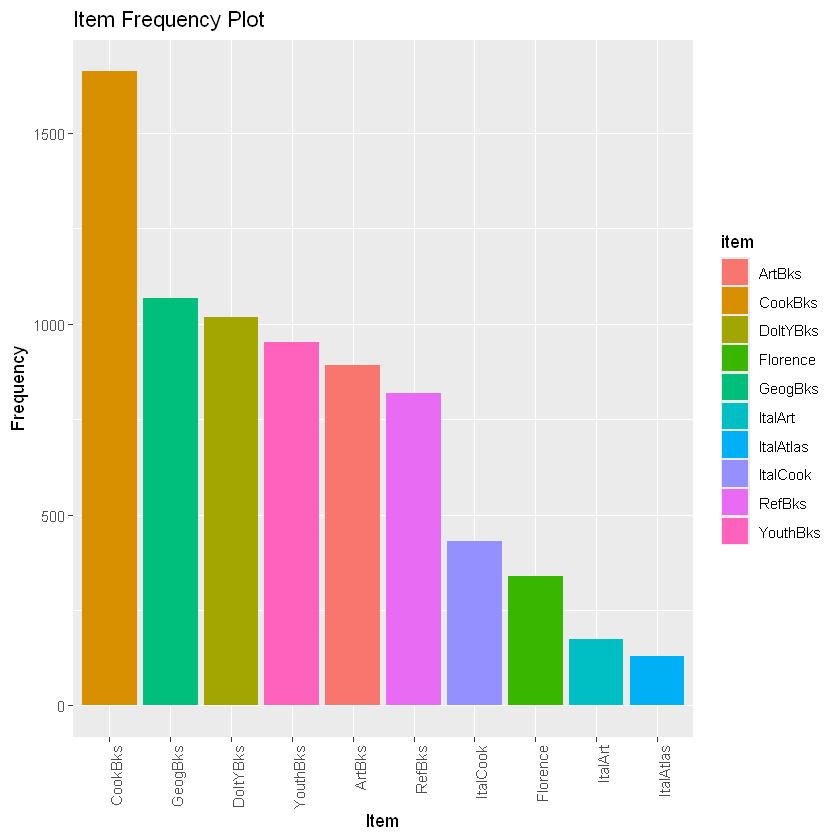

In [6]:
item_freq <- itemFrequency(books_trans, type = "absolute")
item_freq_df <- data.frame(
  item = names(item_freq),
  frequency = item_freq
)

ggplot(item_freq_df, aes(x=reorder(item, -frequency), y=frequency, fill=item)) +
  geom_bar(stat = "identity") + xlab("Item") + ylab("Frequency") + ggtitle("Item Frequency Plot") +
  theme(axis.text.x=element_text(angle=90, hjust=1))

In [7]:
rules <- apriori(books_trans, parameter = list(supp = 200/4000, conf = 0.5, target = "rules"))
inspect(head(sort(rules, by = "lift"), n = 6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 200 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 4000 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [21 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


    lhs                    rhs        support confidence coverage lift    
[1] {DoItYBks, GeogBks} => {YouthBks} 0.05450 0.5396040  0.10100  2.264864
[2] {CookBks, GeogBks}  => {YouthBks} 0.08025 0.5136000  0.15625  2.155719
[3] {CookBks, RefBks}   => {DoItYBks} 0.07450 0.5330948  0.13975  2.092619
[4] {YouthBks, GeogBks} => {DoItYBks} 0.05450 0.5215311  0.10450  2.047227
[5] {YouthBks, CookBks} => {DoItYBks} 0.08375 0.5201863  0.16100  2.041948
[6] {YouthBks, RefBks}  => {CookBks}  0.06825 0.8400000  0.08125  2.021661
    count
[1] 218  
[2] 321  
[3] 298  
[4] 218  
[5] 335  
[6] 273  


# 14.2 协同过滤

In [8]:
library(arules)
library(ggplot2)
library(recommenderlab)

In [9]:
load('Data/MovieLensMovies.rda')
load('Data/MovieLensRatings.rda')
ratings <- get("MovieLensRatings")
movies <- get("MovieLensMovies")

In [10]:
# convert ratings to rating matrix 
idxUserId <- sort(unique(ratings$userId)) 
idxMovieId <- sort(unique(ratings$movieId)) 
m <- matrix(NA, nrow=length(idxUserId), ncol=length(idxMovieId), 
dimnames=list( 
user=paste("u", 1:length(idxUserId), sep=''), 
item=movies$title[match(idxMovieId, movies$movieId)] 
)) 
for (i in 1:nrow(ratings)) { 
rating <- ratings[i,] 
irow <- match(rating$userId, idxUserId) 
icol <- match(rating$movieId, idxMovieId) 
m[irow, icol] <- rating$rating 
} 
ratingMatrix <- as(m, "realRatingMatrix") 

In [20]:
# 将 ratingMatrix 转换为 data.frame
rating_df <- as(ratingMatrix, "data.frame")

# 查看前几行数据
rating_df
str(ratingMatrix)

,user,item,rating
,<chr>,<chr>,<dbl>
1,u1,Toy Story (1995),4
326,u1,Grumpier Old Men (1995),4
434,u1,Heat (1995),4
2108,u1,Seven (a.k.a. Se7en) (1995),5
2380,u1,"Usual Suspects, The (1995)",5
2860,u1,From Dusk Till Dawn (1996),3
3207,u1,Bottle Rocket (1996),5
3388,u1,Braveheart (1995),4
4255,u1,Rob Roy (1995),5


Formal class 'realRatingMatrix' [package "recommenderlab"] with 2 slots
  ..@ data     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:100836] 0 4 6 14 16 17 18 20 26 30 ...
  .. .. ..@ p       : int [1:9725] 0 215 325 377 384 433 535 589 597 613 ...
  .. .. ..@ Dim     : int [1:2] 610 9724
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ user: chr [1:610] "u1" "u2" "u3" "u4" ...
  .. .. .. ..$ item: chr [1:9724] "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
  .. .. ..@ x       : num [1:100836] 4 4 4.5 2.5 4.5 3.5 4 3.5 3 5 ...
  .. .. ..@ factors : list()
  ..@ normalize: NULL


In [21]:
summary(ratingMatrix)

          Length            Class             Mode 
               1 realRatingMatrix               S4 

In [11]:
# UBCF model and prediction 
recommender <- Recommender(ratingMatrix[-1], method="UBCF") 
pred <- predict(recommender, ratingMatrix[1]) 
as(pred, 'list') 

$`0`
 [1] "Bossa Nova (2000)"           "Maltese Falcon, The (1941)" 
 [3] "Michael Clayton (2007)"      "3-Iron (Bin-jip) (2004)"    
 [5] "Battlestar Galactica (2003)" "Enemy at the Gates (2001)"  
 [7] "Watchmen (2009)"             "Walk to Remember, A (2002)" 
 [9] "Tristan & Isolde (2006)"     "Atonement (2007)"

In [12]:
                      
# IBCF model and prediction 
recommender <- Recommender(ratingMatrix[-1], method="IBCF") 
pred <- predict(recommender, ratingMatrix[1]) 
as(pred, 'list') 

$`0`
 [1] "NeverEnding Story III, The (1994)"   "Amateur (1994)"                     
 [3] "Mute Witness (1994)"                 "My Crazy Life (Mi vida loca) (1993)"
 [5] "Miami Rhapsody (1995)"               "Pushing Hands (Tui shou) (1992)"    
 [7] "Suture (1993)"                       "Double Happiness (1994)"            
 [9] "Being Human (1993)"                  "Lassie (1994)"

In [13]:
set.seed(1) 
e <- evaluationScheme(ratingMatrix, method="split", train=0.9, given=10) 

r1 <- Recommender(getData(e, "train"), "UBCF") 
r2 <- Recommender(getData(e, "train"), "IBCF") 
r3 <- Recommender(getData(e, "train"), "RANDOM") 

p1 <- predict(r1, getData(e, "known"), type="ratings") 
p2 <- predict(r2, getData(e, "known"), type="ratings") 
p3 <- predict(r3, getData(e, "known"), type="ratings") 
error <- rbind( 
UBCF = calcPredictionAccuracy(p1, getData(e, "unknown")), 
IBCF = calcPredictionAccuracy(p2, getData(e, "unknown")), 
RANDOM = calcPredictionAccuracy(p3, getData(e, "unknown")) 
) 
error 

,RMSE,MSE,MAE
UBCF,1.155608,1.335429,0.8943074
IBCF,1.314356,1.727531,1.0543478
RANDOM,1.780208,3.169139,1.4539972


In [15]:
# 生成1000个用户对100部电影的评分矩阵
m <- matrix(nrow = 1000, ncol = 100)
m[sample.int(1000*100, 1000)] <- ceiling(runif(1000, 0, 5))
r <- as(m, "realRatingMatrix")
# image(r)
rating_data <- melt(m, varnames = c("User", "Item"), value.name = "Rating", na.rm = TRUE)

# 绘制热力图
# 绘制散点图
ggplot(rating_data, aes(x = Item, y = User, color = Rating)) +
  geom_point() +
  scale_color_gradient(low = "yellow", high = "green") +
  theme_minimal() +
  labs(title = "评分矩阵散点图", x = "物品", y = "用户")

ERROR: Error in melt(m, varnames = c("User", "Item"), value.name = "Rating", : could not find function "melt"


In [ ]:
# 基于用户的协同过滤
UB.Rec <- Recommender(r, method = "UBCF")
pred <- predict(UB.Rec, r, type="ratings")
as(pred, "matrix")[1:15, 1:15]

In [ ]:
# 基于电影的协同过滤
IB.Rec <- Recommender(r, method = "IBCF")
pred <- predict(IB.Rec, r, type="ratings")
as(pred, "matrix")[1:15, 1:15]